# Анализ зарплат в России
### Влияние инфляции на уровень заработной платы

Подключаем необходимые библиотеки

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Устанавливаем константы

In [ ]:
DATA_DIR = 'data/csv/' # путь к csv-файлам

Загружаем файл средних зарплат

In [ ]:
salary_file = DATA_DIR + 'salary.csv'
df_salary = pd.read_csv(salary_file, delimiter=';', decimal=',', index_col='year')

df_salary.head()

,total,construct,horeca,fin,med
year,,,,,
2000,2223.4,2639.8,1640.0,5232.2,1333.3
2001,3240.4,3859.3,2403.6,8885.2,1959.9
2002,4360.3,4806.9,3039.3,13245.9,3141.3
2003,5498.5,6176.7,3966.7,15561.2,3662.6
2004,6739.5,7304.7,4737.3,17383.8,4612.0


Загружаем файл уровня инфляции

In [ ]:
inflation_file = DATA_DIR + 'inflation.csv'
df_inflation = pd.read_csv(inflation_file, delimiter=';', decimal=',', index_col='year', usecols=['year', 'inf'])

df_inflation.head()

,inf
year,
1992,2508.85
1993,839.87
1994,215.02
1995,131.33
1996,21.81


Загружаем файл уровня безработицы

In [ ]:
unrate_file = DATA_DIR + 'unrate.csv'
df_unrate = pd.read_csv(unrate_file, delimiter=';', decimal=',', index_col='year')

df_unrate.head()

,unrate
year,
2000,10.6
2001,9.0
2002,7.9
2003,8.2
2004,7.8


Объединяем датафреймы

In [ ]:
df = pd.concat([df_salary, df_inflation, df_unrate], axis=1).reindex(df_salary.index)

df.head()

,total,construct,horeca,fin,med,inf,unrate
year,,,,,,,
2000,2223.4,2639.8,1640.0,5232.2,1333.3,20.20,10.6
2001,3240.4,3859.3,2403.6,8885.2,1959.9,18.58,9.0
2002,4360.3,4806.9,3039.3,13245.9,3141.3,15.06,7.9
2003,5498.5,6176.7,3966.7,15561.2,3662.6,11.99,8.2
2004,6739.5,7304.7,4737.3,17383.8,4612.0,11.74,7.8


In [ ]:
def get_salary_inf(i, year):
    res = 1
    for y in range(min(i.index), year + 1):
        res *= (1 + df['inf'][y] / 100)
    return (res - 1) * 100

Рассчитываем зарплаты с учетом инфляции относительно 2000 года

In [ ]:
start_year = min(df.index)
columns = df_salary.columns

for col in columns:
    col_real = [df[col][start_year]]
    col_inf = [df[col][start_year]]

    for i in range(start_year + 1, start_year + len(df)):
        r = col_inf[i - start_year - 1] * (1 + df['inf'][i] / 100)
        col_inf.append(r)
        col_real.append(df[col][start_year] * df[col][i] / r)

    df[col + '_inf'] = col_real

df.head()

,total,construct,horeca,fin,med,inf,unrate,total_inf,construct_inf,horeca_inf,fin_inf,med_inf
year,,,,,,,,,,,,
2000,2223.4,2639.8,1640.0,5232.2,1333.3,20.20,10.6,2223.400000,2639.800000,1640.000000,5232.200000,1333.300000
2001,3240.4,3859.3,2403.6,8885.2,1959.9,18.58,9.0,2732.669927,3254.596053,2026.986001,7493.000506,1652.808231
2002,4360.3,4806.9,3039.3,13245.9,3141.3,15.06,7.9,3195.807085,3523.134893,2227.602796,9708.355174,2302.361946
2003,5498.5,6176.7,3966.7,15561.2,3662.6,11.99,8.2,3598.563487,4042.420131,2596.057431,10184.225904,2397.035305
2004,6739.5,7304.7,4737.3,17383.8,4612.0,11.74,7.8,3947.334681,4278.373120,2774.643309,10181.716244,2701.254922


Строим графики

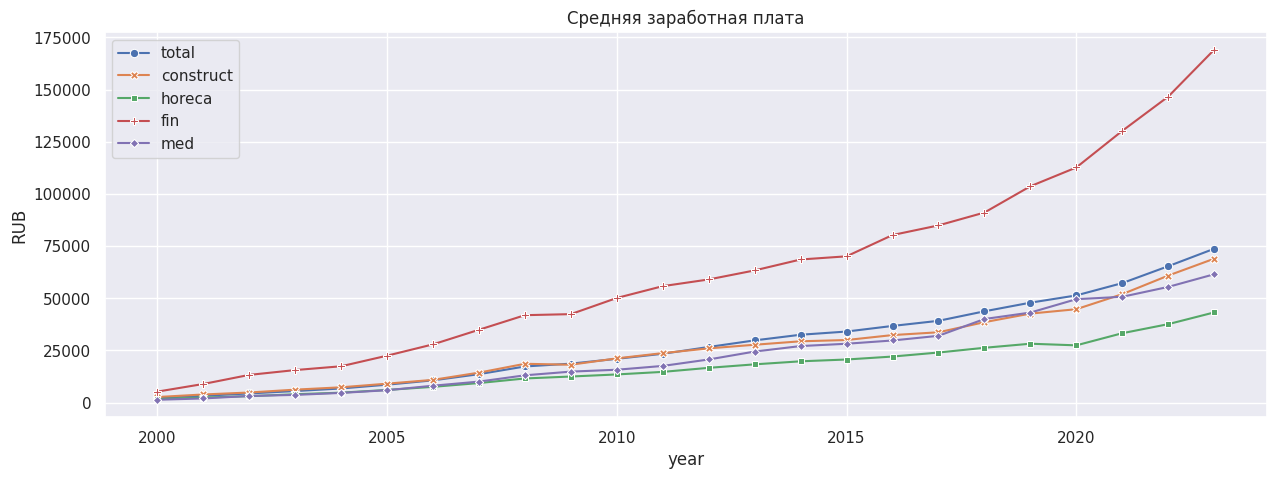

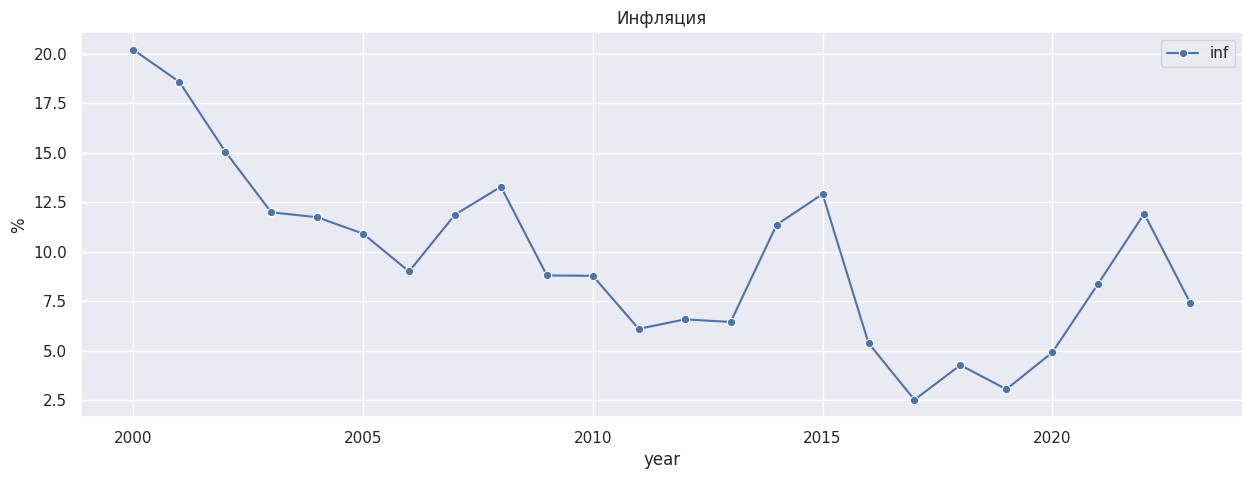

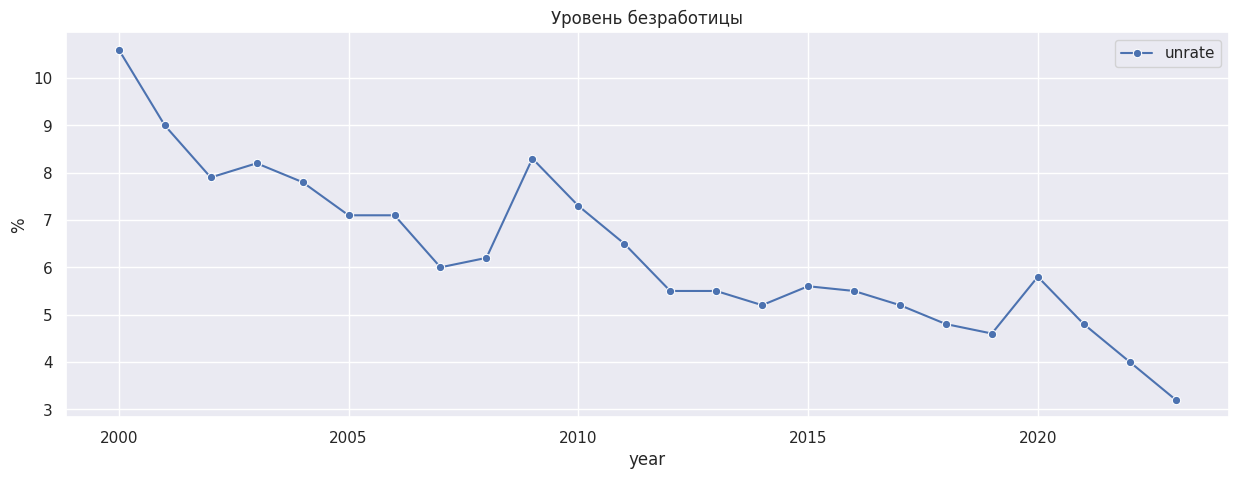

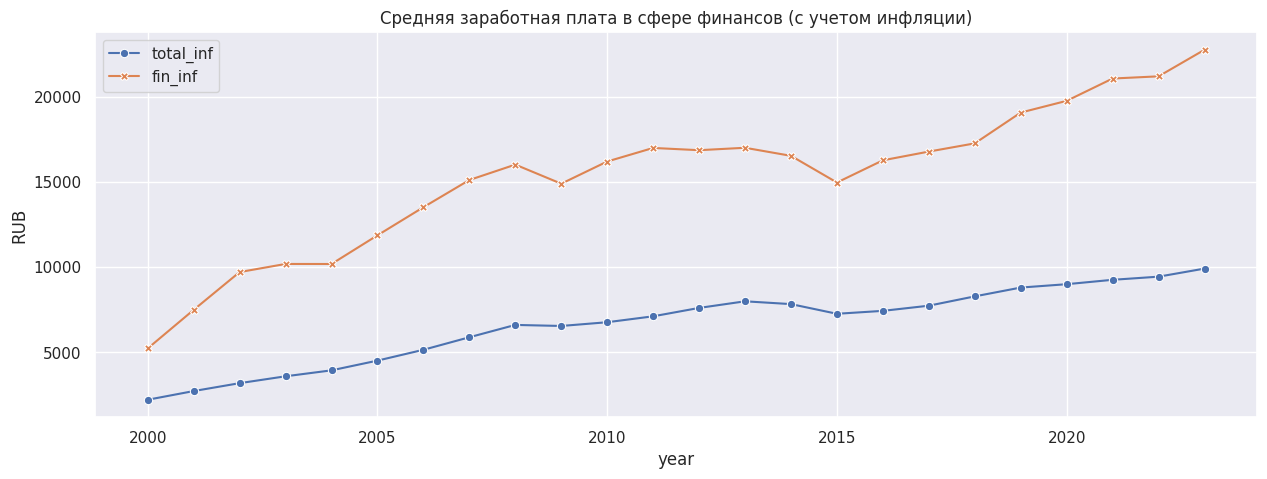

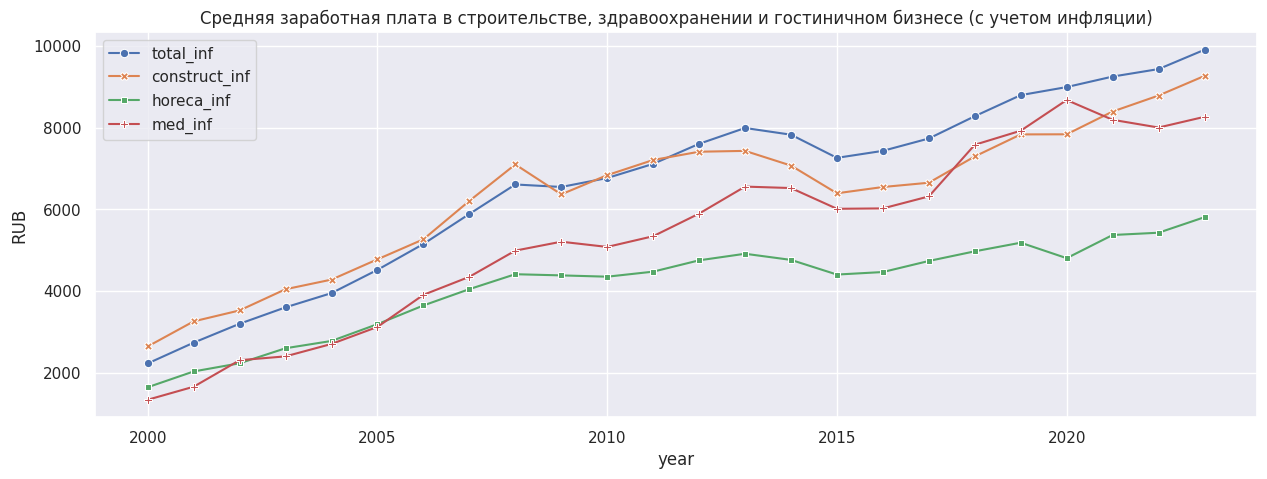

In [ ]:
sns.set(rc={'figure.figsize':(15, 5)})
sns.lineplot(data=df[columns], markers=True, dashes=False)
plt.title("Средняя заработная плата")
plt.xlabel("year", size = 12)
plt.ylabel("RUB", size = 12)
plt.show()

sns.lineplot(data=df[['inf']], markers=True)
plt.title("Инфляция")
plt.xlabel("year", size = 12)
plt.ylabel("%", size = 12)
plt.show()

sns.lineplot(data=df[['unrate']], markers=True)
plt.title("Уровень безработицы")
plt.xlabel("year", size = 12)
plt.ylabel("%", size = 12)
plt.show()

sns.lineplot(data=df[['total_inf', 'fin_inf']], markers=True, dashes=False)
plt.title("Средняя заработная плата в сфере финансов (с учетом инфляции)")
plt.xlabel("year", size = 12)
plt.ylabel("RUB", size = 12)
plt.show()

sns.lineplot(data=df[['total_inf', 'construct_inf', 'horeca_inf', 'med_inf']], markers=True, dashes=False)
plt.title("Средняя заработная плата в строительстве, здравоохранении и гостиничном бизнесе (с учетом инфляции)")
plt.xlabel("year", size = 12)
plt.ylabel("RUB", size = 12)
plt.show()

### Выводы

1.   При повышенном уровне инфляции реальная заработная плата растет медленнее или даже снижается при формальном росте номинальной заработной платы.

2.   До 2008 года (год экономического кризиса) зарплата в сфере строительства была больше средней по экономике, затем был скачок вниз, и с 2013 года она стала ниже средней.

3.   В 2020 году (год пандемии COVID-19) можно отметить выраженный рост зарплаты в сфере здравоохранения на фоне незначительного роста или даже снижения зарплаты в других сферах.